# Basic Concept of Population and Sample

Before applying statistics into our stock data, let's find out the basic concept of population and sample.

In [16]:
# Import packages

import numpy as np
import pandas as pd
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Create a population in a Data Frame with size (N) = 10

df_pop = pd.DataFrame()
df_pop['Population'] = pd.DataFrame([47, 48, 85, 20, 19, 13, 72, 16, 50, 60])
df_pop

,Population
0,47
1,48
2,85
3,20
4,19
5,13
6,72
7,16
8,50
9,60


In [18]:
# Take a sample with replacement, with sample size (n) = 5

df_smp_rep = df_pop.sample(5, replace = True)
print(df_smp_rep['Population'])

# Take a sample without replacement, with sample size (n) = 5

df_smp_norep = df_pop.sample(5, replace = False)
print(df_smp_norep['Population'])

5    13
9    60
8    50
5    13
0    47
Name: Population, dtype: int64
4    19
1    48
9    60
3    20
6    72
Name: Population, dtype: int64


### Parameter and Statistics

In [20]:
# Calculate population mean and variance

pop_mean = df_pop['Population'].mean()
pop_var = df_pop['Population'].var()

print('Population mean is ', pop_mean)
print('Population variance is', pop_var)

Population mean is  43.0
Population variance is 635.3333333333334


In [21]:
# Calculate sample mean and variance

smp_mean = df_smp_rep['Population'].mean()
smp_var = df_smp_rep['Population'].var()

print('Sample mean is ', smp_mean)
print('Population variance is', smp_var)

Sample mean is  36.6
Population variance is 487.29999999999995


### Average Unbiased Estimator

In [22]:
# Comparing the average biased estimator (denominator as n) vs. average unbiased estimator (n-1)
# Difference in parameter ddof = 1 (unbiased) and ddof = 0 (biased)

smp_size = 500
smp_var_collection_be = [df_pop['Population'].sample(50, replace = True).var(ddof = 1) for i in range(smp_size)]
smp_var_collection_ube = [df_pop['Population'].sample(50, replace = True).var(ddof = 0) for i in range(smp_size)]

print()
print('Average unbiased estimator: ', smp_var_collection_be[0].mean())
print('Average biased estimator: ', smp_var_collection_ube[0].mean())


Average unbiased estimator:  612.2710204081633
Average biased estimator:  540.4835999999999


# Variation of Sample

Now, let's talk about the concept of variation of the sample from the population.

In [39]:
# Create a random sampling from normal distribution
# Using np.random.normal() with parameter mean = 20, std. dev = 10

fstsmp = pd.DataFrame(np.random.normal(20, 10, size = 50))
print('Mean: ', fstsmp[0].mean()) 
print('Std. Dev: ', fstsmp[0].std())

Mean:  20.1203807617058
Std. Dev:  10.050962703896971


### Empirical Distribution of Mean

In [43]:
# Create a meanlist 

meanlist = []
for i in range(5000):
    smp = pd.DataFrame(np.random.normal(20, 10, size = 50))
    meanlist.append(smp[0].mean())
    
meanlist[0:10]

[18.106544547062086,
 19.7713998540146,
 19.350583182203014,
 19.510322881782376,
 22.186565888205532,
 21.31358818417765,
 19.485456332089438,
 20.09746242268595,
 21.33227647681367,
 19.801034969590713]

In [45]:
collect = pd.DataFrame()
collect['meanlist'] = meanlist

collect

,meanlist
0,18.106545
1,19.771400
2,19.350583
3,19.510323
4,22.186566
...,...
4995,19.625895
4996,19.685139
4997,19.874383
4998,20.136141


<AxesSubplot:>

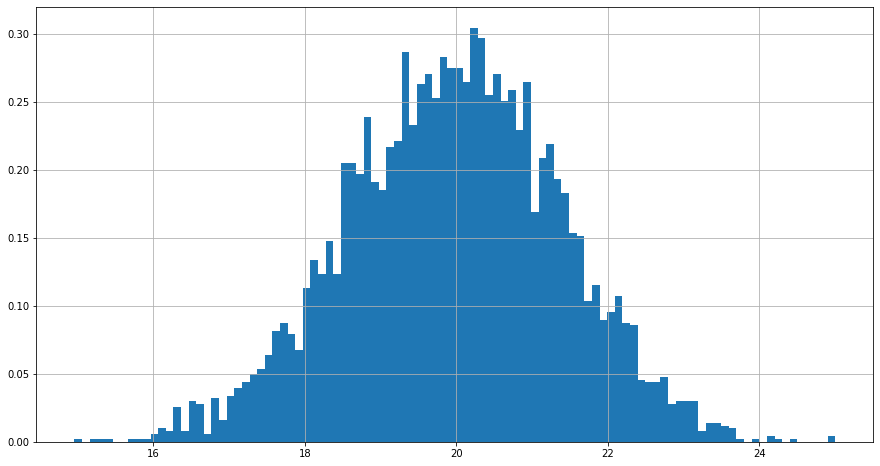

In [51]:
collect['meanlist'].hist(bins = 100, density = True, stacked = True, figsize = (15, 8))

### Sampling from Skewed Distribution

array([[<AxesSubplot:title={'center':'meanlist'}>]], dtype=object)

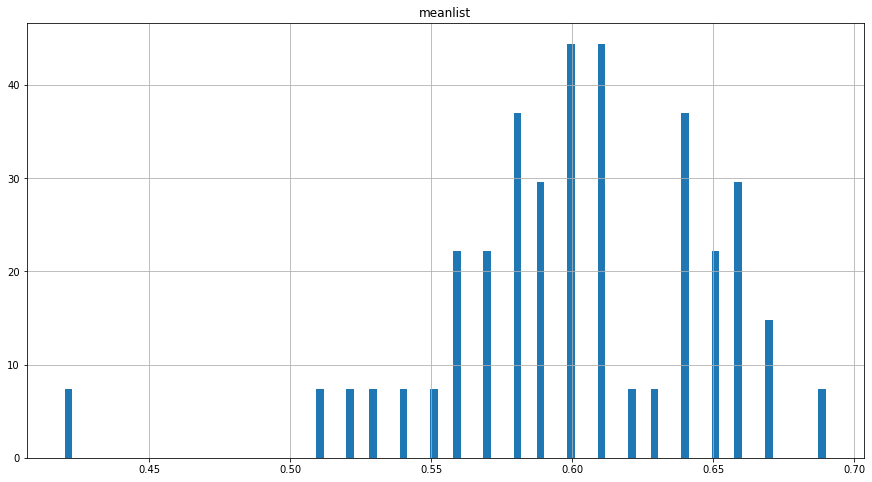

In [60]:
# Central Limit Theorem
# If the sample size is large enough, the distribution of sample mean is approximately normal
# Even the population is non-normal distributed
# Try with a small sample size

apop =  pd.DataFrame([1, 0, 1, 0, 1])

smp2_size = 100
smp2_meanlist = []
for t in range(50):
    smp2 = apop[0].sample(smp2_size, replace = True)
    smp2_meanlist.append(smp2.mean())

collec2 = pd.DataFrame()
collec2['meanlist'] = smp2_meanlist
collec2.hist(bins = 100, density = True, stacked = True, figsize = (15, 8))

array([[<AxesSubplot:title={'center':'meanlist'}>]], dtype=object)

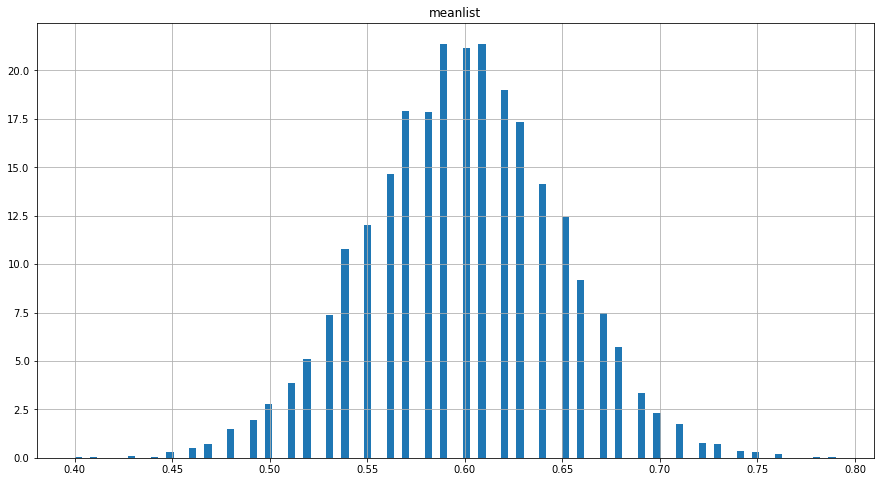

In [62]:
# Try with a large sample size
# Changing parameter in the iternation range

smp3_size = 100
smp3_meanlist = []
for t in range(10000):
    smp3 = apop[0].sample(smp3_size, replace = True)
    smp3_meanlist.append(smbp3.mean())

collec3 = pd.DataFrame()
collec3['meanlist'] = smp3_meanlist
collec3.hist(bins = 100, density = True, stacked = True, figsize = (15, 8))

# Estimate the Average Stock Return 

Now, let's apply the confidence interval to our stock data. I will be using the Facebook data to analyze it's average stock return using confidence interval.

In [68]:
# Importing Facebook stock to data frame
# Cleaning the Facebook stock data frame

df_fb = pd.read_csv('data/facebook.csv', index_col = 0)
df_fb.index = pd.to_datetime(df_fb.index)

df_fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [81]:
# Calculate the log daily return of Facebook stock

df_fb['LogDR'] = np.log(df_fb['Close'].shift(-1)) - np.log(df_fb['Close'])
df_fb.head()

,Open,High,Low,Close,Adj Close,Volume,LogDR
Date,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,0.003982
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,-0.017034
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.030787
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.002609
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,0.036927


In [84]:
# Calculate sample size, mean, and standard deviation

smp_size = df_fb['LogDR'].shape[0]
smp_mean = df_fb['LogDR'].mean()
smp_std = df_fb['LogDR'].std(ddof = 1) / smp_size ** 0.5

print(smp_size, smp_mean, smp_std)

780 0.0030376688631700453 0.0008973570533173784


In [90]:
# Calculate right and left quantile
# Set ppf parameter to 0.05 and 0.95

z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

# Calculate interval

interval_left = smp_mean + (z_left * smp_std)
interval_right = smp_mean + (z_right * smp_std)

print('Sample mean is ', smp_mean)
print('90% confidence interval is ', (interval_left, interval_right))

# Both of the intervals are positive number, this implies that the average daily return is likely to be positive.

Sample mean is  0.0030376688631700453
90% confidence interval is  (0.0015616478593504692, 0.00451368986698962)


# Validate the Average Stock Return

Now, let's validate whether the average stock return is positive or not using hypothesis testing. I will still use the Facebook stock data from previous module.

<function matplotlib.pyplot.show(close=None, block=None)>

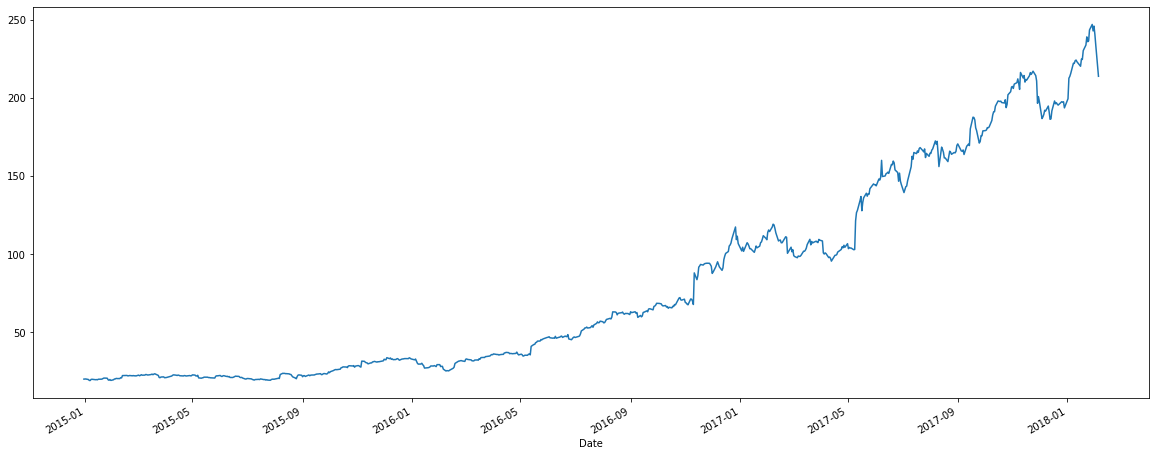

In [99]:
df_fb['Close'].plot(figsize=(20, 8))
plt.show

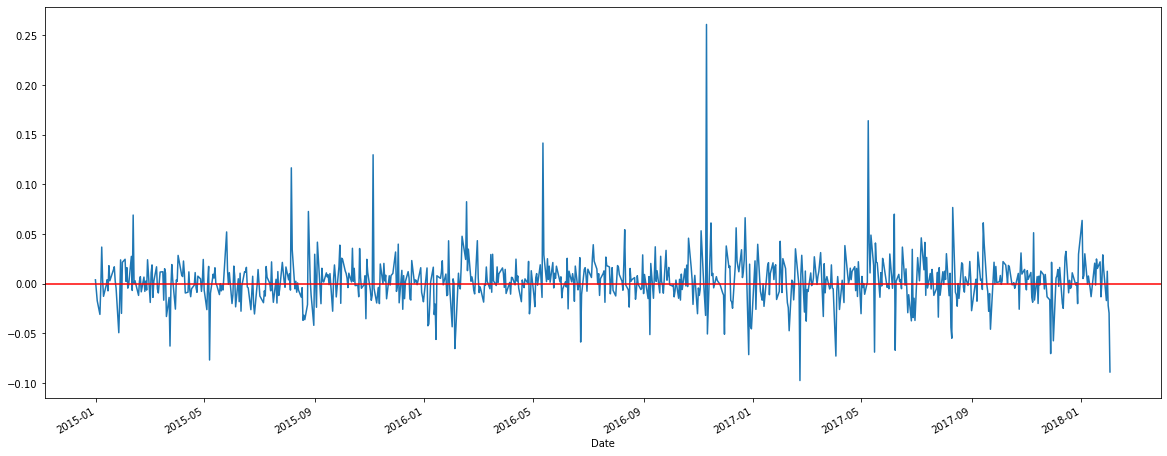

In [100]:
df_fb['LogDR'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

From the first visualization, I can see that the stock price increases from time to time. But, looking from the second visualization, I can see that sometimes price goes up, and sometimes price goes down. To validate whether the average stock return is positive or negative, I will use the hypothesis testing.

### Two-tail test

$H_0 : \mu = 0$ 
$H_a : \mu \neq 0$

$H_0$ means the average stock return is 0 \
$H_a$ means the average stock return is not equal to 0

In [105]:
# Recall the test statistic of the sample

smp_size = df_fb['LogDR'].shape[0]
smp_mean = df_fb['LogDR'].mean()
smp_std = df_fb['LogDR'].std(ddof = 1)

# If sample size n is large enough, we can use z-dist instead of t-dist
# I have 780 records for the sample, it is large enough
# Calculate z-dist with assumption mu population = 0

z_hat = (smp_mean - 0) / (smp_std / smp_size ** 0.5)
print(z_hat)

3.385128418994751


In [109]:
# Set decision criteria, with confidence level at 0.05
# Set norm.ppf to standard normal distribution

alp = 0.05
z_left = norm.ppf(alp / 2, 0, 1)
z_right = - z_left
print(z_left, z_right)

-1.9599639845400545 1.9599639845400545


In [112]:
# Test the z_hat to the z_left and z_right

if z_hat < z_left or z_hat > z_right :
    print("Because z_hat outside the z_left and z_right, I shall reject the null hypothesis") 
else :
    print("Because z_hat inside the z_left and z_right, I didn't reject the null hypothesis")

Because z_hat outside the z_left and z_right, I shall reject the null hypothesis


From this, we know that the sample mean is not equal to 0. Thus, the average return of stock is not equal to zero. Now, I would like to know whether the average return stock is positive or not using one-tail test.

### One-Tail Test

Let's find out if the average return stock of Facebook is positive or negative.

$H_0 : \mu \leq 0$ \
$H_a : \mu > 0$

$H_0$ means the average stock return is 0 \
$H_a$ means the average stock return is not equal to 0

In [114]:
# Set decision criteria, with confidence level at 0.05
# Set norm.ppf to standard normal distribution

alp = 0.05
z_right_ott = norm.ppf(1 - alp, 0, 1)
print(z_right_ott)

1.6448536269514722


In [116]:
# Test the z_hat to the z_right_ott

if z_hat > z_right_ott :
    print("Because z_hat is bigger than z_right_ott, I shall reject the null hypothesis") 
else :
    print("Because z_hat is smaller thatn z_right_ott, I didn't reject the null hypothesis")

Because z_hat is bigger than z_right_ott, I shall reject the null hypothesis


From this, we know that the sample mean is not below 0. Thus, the average return of Facebook stock is positive from 2014 until 2018.

### Alternative : Using p-value instead of z-distribution

Instead of z-distribution, we can test the hypothesis using alternative calculation which is p-value.

In [118]:
# Find the p-value from z_hat

p = 1 - norm.cdf(z_hat, 0, 1)
print(p)

0.00035572480756884683


In [121]:
# Test the p-value to the alpha = 0.05

if p < alp :
    print("Because p-value is smaller than critical value, I shall reject the null hypothesis") 
else :
    print("Because p-value is bigger than critical value, I didn't reject the null hypothesis")

Because p-value is smaller than critical value, I shall reject the null hypothesis
